In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
nf=pd.read_csv('netflix_titles.csv')

In [22]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [23]:
nf.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6233,70153404,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...


In [24]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [25]:
nf.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


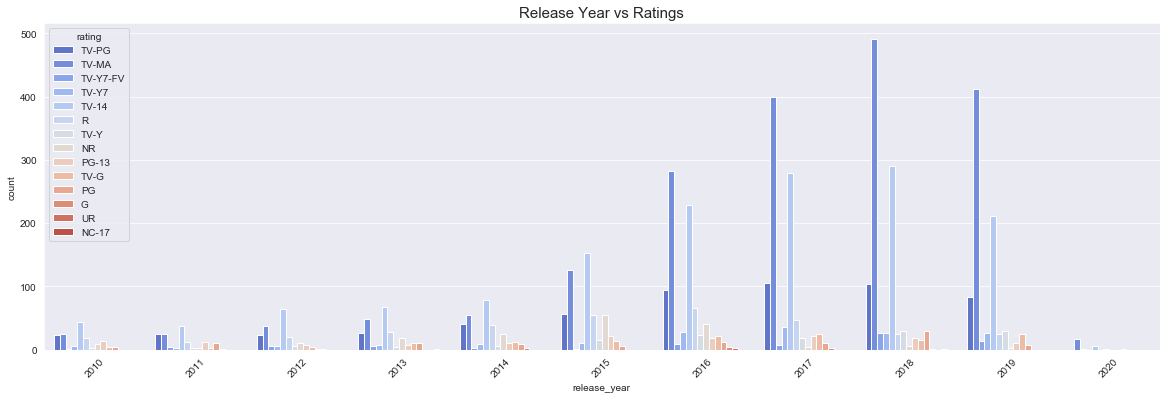

In [26]:
#relation between release year and ratings of netflix shows

plt.figure(figsize=(20,6))
plt.title('Release Year vs Ratings',fontsize=15)
sns.set_style('darkgrid')
sns.countplot(nf[nf['release_year']>=2010]['release_year'],hue=nf['rating'],palette='coolwarm',color='purple')
plt.xticks(rotation=45)
plt.show()

In [27]:
nf.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [28]:
#Data Cleaning
#To remove null values apply rating of shows/films the maximum rating of that year released
df=nf.copy()
s=nf[(nf['rating'].isnull()) & (nf['release_year']>=2016)].index
lis=nf['rating'].tolist()
for i in s:
    lis[i]='TV-MA'
nf['rating_new']=lis
s=nf[(nf['rating_new'].isnull()) & (nf['release_year']<2016)].index
lis=nf['rating_new'].tolist()
for i in s:
    lis[i]='TV-14'
nf['rating_new']=lis
nf.drop('rating',axis=1)


,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,rating_new
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,TV-PG
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,TV-MA
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,1 Season,Kids' TV,"With the help of three human allies, the Autob...",TV-Y7-FV
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,TV-Y7
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,99 min,Comedies,When nerdy high schooler Dani finally attracts...,TV-14
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NR
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",TV-MA
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,60 min,Movies,Nursery rhymes and original music for children...,TV-MA
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ...",TV-MA


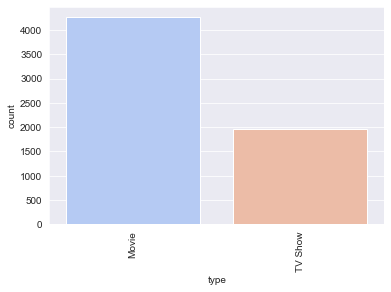

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='type',data=nf,palette='coolwarm')
plt.xticks(rotation=90)
plt.show()


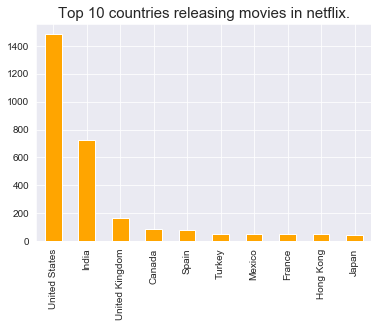

In [30]:
plt.title(label='Top 10 countries releasing movies in netflix.',fontsize=15)
nf[nf['type']=='Movie']['country'].value_counts()[:10].plot(kind='bar',color='orange')


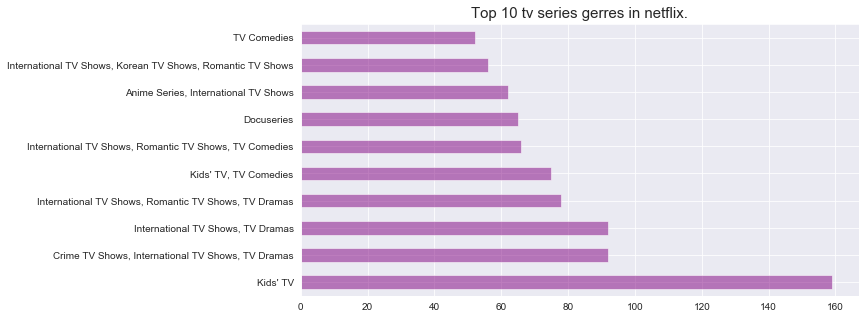

In [31]:
plt.figure(figsize=(10,5))
plt.title(label='Top 10 tv series gerres in netflix.',fontsize=15)

nf[nf['type']=='TV Show']['listed_in'].value_counts()[:10].plot(kind='barh',color='purple',alpha=0.5)


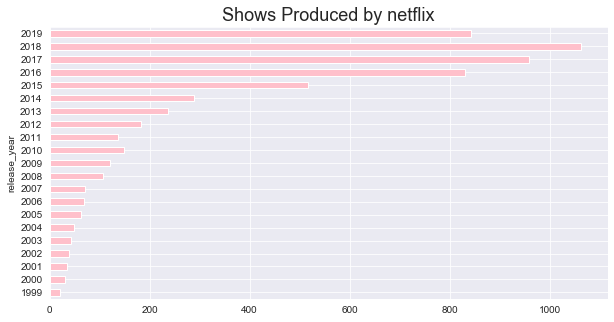

In [32]:
plt.figure(figsize=(10,5))
plt.title(label='Shows Produced by netflix',fontsize=18)
nf.groupby('release_year')['type'].count()[-22:-1].plot(kind='barh',color='pink')


In [33]:
nf[nf['type']=='TV Show']['duration'].value_counts()

1 Season      1321
2 Seasons      304
3 Seasons      158
4 Seasons       61
5 Seasons       46
6 Seasons       22
7 Seasons       21
8 Seasons       16
9 Seasons        7
11 Seasons       3
10 Seasons       3
15 Seasons       2
13 Seasons       2
12 Seasons       2
14 Seasons       1
Name: duration, dtype: int64

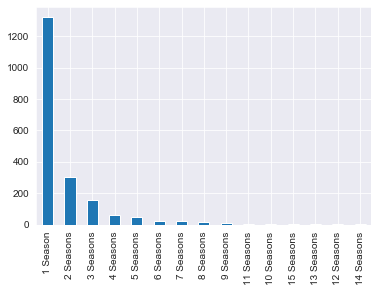

In [34]:
plt.title('Duration of TV Shoes on Netflix')
nf[nf['type']=='TV Show']['duration'].value_counts().plot(kind='bar')
#So majority of shows are 1 season

In [35]:
nf.drop('director',inplace=True,axis=1)


In [36]:
nf.drop('cast',inplace=True,axis=1)
nf['country'].fillna(value='United States',inplace=True)
nf.drop('rating',axis=1,inplace=True)

In [37]:
l=[]
def fun(x):
    l.append(x.split()[0])
nf['date_added'].dropna().apply(fun)
nf.dropna(inplace=True)
nf['month']=l
nf
#A new column month is added to dataframe

,show_id,type,title,country,date_added,release_year,duration,listed_in,description,rating_new,month
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,TV-PG,September
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,TV-MA,September
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,1 Season,Kids' TV,"With the help of three human allies, the Autob...",TV-Y7-FV,September
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,TV-Y7,September
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,99 min,Comedies,When nerdy high schooler Dani finally attracts...,TV-14,September
...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,"Cyprus, Austria, Thailand","April 10, 2019",2017,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...,TV-G,April
6219,80186475,TV Show,Pokémon the Series,Japan,"April 1, 2019",2019,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...,TV-Y7-FV,April
6220,70272742,TV Show,Justin Time,Canada,"April 1, 2016",2012,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien...",TV-Y,April
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,Japan,"April 1, 2016",2016,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...,TV-14,April


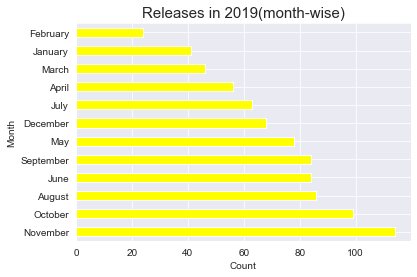

In [38]:
plt.title('Releases in 2019(month-wise)',fontsize=15)
plt.xlabel('Count')
plt.ylabel('Month')
nf[nf['release_year']==2019]['month'].value_counts().plot(kind='barh',color='yellow')
#in 2019 november has more releases